# Using the SMA Backtester Class
1. SMA Backtester class would allow to test many moving average crossover strategies using just a few lines of code
2. We aim to test strategies on different instruments (in this case 3 forex pairs) and change timeperiods and rolling windows
3. It is imperative that the backtester class file is saved as .py and saved in the same folder as the file it is being imported to
4. We are creating a class for Vectorised Backtesting of SMA Crossover strategies
5. SMA backtester class imports data from the csv file
6. First step is the creation of an SMA backtester object
7. Backtesting and Forward Testing
    * Since we have fitted our parameters/strategy to past data, so that's no guarantee that our strategy will outperform in future as well
    * That is why we need to perform an OUT-SAMPLE TEST aka FORWARD TEST to test the parameters on new/fresh data
    * This is done by splitting the dataset into two: Training Period and Testing Period
    * It is very likely that a strategy does not deliver the same high performance in out-sample test as it did in backtest
    

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
plt.style.use('seaborn')

# Building the SMA Backtester Class: Instantiation

In [2]:
# Naming our class as SMABacktester
# using the dunder init method and assigning some properties to our class after instantiation
# The very first object is always self
# We have five properties we wish to add: ticker symbol, short SMA period, long SMA period, start date and end date

class SMABacktester():
    
    def __init__(self, symbol, SMA_S, SMA_L, start, end): # the properties we wish to add. Don't forget self!
        self.symbol = symbol # defining initial attributes which were passed above during instantiation
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None # We can add result attribute here, pass None through it. It can be modified later in a method

# Method get_data()
1. Before we can test an SMA strategy we need to retrieve price data and calculate returns of SMAs over time
2. The Steps are as follows
    * Import Dataset: Create a connect to the data source. The data can be in a csv file, or an SQL Database, or we can directly link the method to a brokerage platform like Oanda/FXCM. Here we import data from csv file
    * Select the instrument on which the strategy needs to be tested. 
    * Convert the resulting pandas series to a dataframe and dropna values
    * Set a time period
    * Clean up the data
    * Calculate and Create a log returns column
    * Create a Shorter SMA and a longer SMA column

In [3]:
# Adding the get_data() method
# if we run get_data() in dunder init method, it will be called during instantiating object

class SMABacktester():
    
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data() # running get_data() in dunder init method
        
        
    def get_data(self): # We only have one parameter here, self
        raw = pd.read_csv('forex_pairs.csv', parse_dates = ['Date'], index_col = 'Date')
        # retrieving data from csv file and saving it to a raw dataframe
        raw = raw[self.symbol].to_frame().dropna()
        # selecting the desired symbol, converting pandas series into a dataframe and dropping na values
        raw = raw.loc[self.start : self.end].copy()
        # setting the time period we need to analyse and overwriting the raw dataframe
        raw.rename(columns = {self.symbol : 'price'}, inplace = True)
        # cleaning the data by renaming columns
        raw['returns'] = np.log(raw / raw.shift(1))
        # creating a log returns column in the dataframe
        raw['SMA_S'] = raw['price'].rolling(self.SMA_S).mean()
        raw['SMA_L'] = raw['price'].rolling(self.SMA_L).mean()
        # Adding the SMA_S and SMA_L columns
        self.data = raw
        # storing the raw dataframe in a new attribute data
        return raw

In [4]:
# creating an instance tester
tester = SMABacktester('AUDEUR=X', 50, 200, '2010-01-01', '2019-12-31')

In [5]:
# since we have added the object get_data() in dunder init method, we can directly get data here
tester.data.head()

,price,returns,SMA_S,SMA_L
Date,,,,
2010-01-01,0.62402,NaN,NaN,NaN
2010-01-04,0.63230,0.013182,NaN,NaN
2010-01-05,0.63430,0.003158,NaN,NaN
2010-01-06,0.63860,0.006756,NaN,NaN
2010-01-07,0.64060,0.003127,NaN,NaN


In [6]:
# Checking if get_data() method works
tester.get_data().tail()

,price,returns,SMA_S,SMA_L
Date,,,,
2019-12-25,0.62410,-0.000240,0.617223,0.619946
2019-12-26,0.62380,-0.000481,0.617499,0.619907
2019-12-27,0.62550,0.002722,0.617745,0.619901
2019-12-30,0.62441,-0.001744,0.617958,0.619868
2019-12-31,0.62493,0.000833,0.618139,0.619838


# Setting new SMA Parameters
1. Our SMABacktester class should allow us to set new SMA parameters to test other SMA strategies with different periods
2. We also need to able to find optimal strategy with brute force algorithm, that tests all possible combinations of SMA_S and SMA_L
3. Here the concept of ENCAPSULATION is introduced
    * When overwriting attributes, it is possible the changes are not updated automatically everywhere in related objects
    * Encapsulation recommends creating protected or private properties to avoid such situations
    * If we want to allow setting new values, we should use the set() method
    * In this case we would need to transform SMA_S and SMA_L as protected properties   
4. We can also add arguments to set new symbol or new start and end date paramters

In [7]:
# Setting new SMA parameters

class SMABacktester():
    
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data() 
        
        
    def get_data(self):
        raw = pd.read_csv('forex_pairs.csv', parse_dates = ['Date'], index_col = 'Date')
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start : self.end].copy()
        raw.rename(columns = {self.symbol : 'price'}, inplace = True)
        raw['returns'] = np.log(raw / raw.shift(1))
        raw['SMA_S'] = raw['price'].rolling(self.SMA_S).mean()
        raw['SMA_L'] = raw['price'].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        # as always, first parameter is self, and default is set as None for SMA_S and SMA_L
        if SMA_S is not None:
            self.SMA_S = SMA_S 
            self.data['SMA_S'] = self.data['price'].rolling(self.SMA_S).mean() # recalculating new SMA_S values
            # If a new value is passed for SMA_S then the value and the dataframe column, both are updated
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data['SMA_L'] = self.data['price'].rolling(self.SMA_L).mean() # recalculating new SMA_L values
            # If a new value is passed for SMA_L then the value and the dataframe column, both are updated

In [8]:
# creating a tester object to check functionality
tester = SMABacktester ('AUDEUR=X', 50, 200, '2010-01-01', '2019-12-31')

In [9]:
# Checking the number of missing values in a dataframe
# We should have 49 missing values for SMA_S, and 199 missing values for SMA_L
tester.data.isna().sum()

price        0
returns      1
SMA_S       49
SMA_L      199
dtype: int64

In [10]:
# Setting new SMA_S and SMA_L parameters
tester.set_parameters(SMA_S = 25, SMA_L = 150)

In [11]:
# Checking if the attributes have been updated or not
tester.SMA_S

25

In [12]:
# Checking the new number of missing values in our dataframe
tester.data.isna().sum()

price        0
returns      1
SMA_S       24
SMA_L      149
dtype: int64

In [13]:
# it turns out that our set_parameter() method has updated SMA_S and SMA_L values everywhere

# Testing a Strategy and returning Performance Metrics
1. This is where we define when to take positions and calculate daily strategy returns
2. We create new columns containing cumulative buy and hold returns and strategy returns
2. We also calculate metrics on absolute performance and outperformance relative to buy and hold strategy

In [14]:
# Defining our test_strategy method

class SMABacktester():
    
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data() 
        
        
    def get_data(self):
        raw = pd.read_csv('forex_pairs.csv', parse_dates = ['Date'], index_col = 'Date')
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start : self.end].copy()
        raw.rename(columns = {self.symbol : 'price'}, inplace = True)
        raw['returns'] = np.log(raw / raw.shift(1))
        raw['SMA_S'] = raw['price'].rolling(self.SMA_S).mean()
        raw['SMA_L'] = raw['price'].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S 
            self.data['SMA_S'] = self.data['price'].rolling(self.SMA_S).mean() 
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data['SMA_L'] = self.data['price'].rolling(self.SMA_L).mean()
            
           
    def test_strategy(self): # No arguments other than self to pass here
        data = self.data.copy().dropna()
        # dataframe stored in self.data is selcted. a copy is created to avoid overwriting on self.data. NA values 
        # are removed. new dataframe is saved in variable data
        data['position'] = np.where(data['SMA_S'] > data['SMA_L'], 1, -1)
        # a new column for position. if SMA_S larger than SMA_L, next day's position should be +1; or else -1(short)
        data['strategy'] = data['position'].shift(1) * data['returns']
        # a new column for strategy. we shift the values in position column 1 place down and multiply it with daily returns
        data.dropna(inplace = True)
        # dropping first rows with missing value
        data['creturns'] = data['returns'].cumsum().apply(np.exp)
        # calculating cumulative returns of buy and hold. Value of $1 if bought and held till end of period
        data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)
        # calculating cumulative returns of our strategy. Value of $1 if invested in our SMA strategy
        self.results = data
        # storing new dataframe in attribute results. results was set to None in dunder init method
        
        perf = data['cstrategy'].iloc[-1] 
        # absolute performance: Evolution of $1 over time. The last element in cstrategy column
        outperf = perf - data['creturns'].iloc[-1] 
        # outperformance: subtracting last element in cstrategy with last element in creturns
        return round(perf, 6), round(outperf,6)
        # rounding off to 6 decimals

In [15]:
# creating an instance of the class to see if test_strategy() method works
tester = SMABacktester('EURUSD=X', 50, 200, '2004-01-01', '2020-06-30')

In [16]:
# testing our strategy by calling method test_strategy()
tester.test_strategy()

(1.2835, 0.367674)

In [17]:
# It might be better to label the results as Absolute performance and Overperformance by using print instead of return
# in the last line of method test_strategy()

In [18]:
# test_strategy() method keeps the raw data untouched
tester.data.head()

,price,returns,SMA_S,SMA_L
Date,,,,
2004-01-01,1.258194,NaN,NaN,NaN
2004-01-02,1.258194,0.000000,NaN,NaN
2004-01-05,1.268698,0.008313,NaN,NaN
2004-01-06,1.272103,0.002681,NaN,NaN
2004-01-07,1.264095,-0.006315,NaN,NaN


In [19]:
# Checking the dataframe of our test results
tester.results.tail()

,price,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy
Date,,,,,,,,
2020-06-24,1.131235,0.002892,1.101794,1.103430,-1,-0.002892,0.921130,1.271272
2020-06-25,1.125087,-0.005449,1.102486,1.103540,-1,0.005449,0.916125,1.278218
2020-06-26,1.122208,-0.002562,1.103213,1.103627,-1,0.002562,0.913781,1.281497
2020-06-29,1.122586,0.000337,1.103931,1.103730,1,-0.000337,0.914089,1.281065
2020-06-30,1.124720,0.001899,1.104695,1.103857,1,0.001899,0.915826,1.283500


# Plotting the results
1. In many cases a chart is so much more than a bunch of numbers
2. Comparing buy and hold returns with our strategy in a visual manner gives dramatic insights into the periods where the outperformance occurred, and whether the outperformance was stable or not

In [20]:
# Plotting the results of our strategy and buy and hold for visual comparison by defining plot_results() method

class SMABacktester():
    
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data() 
        
        
    def get_data(self):
        raw = pd.read_csv('forex_pairs.csv', parse_dates = ['Date'], index_col = 'Date')
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start : self.end].copy()
        raw.rename(columns = {self.symbol : 'price'}, inplace = True)
        raw['returns'] = np.log(raw / raw.shift(1))
        raw['SMA_S'] = raw['price'].rolling(self.SMA_S).mean()
        raw['SMA_L'] = raw['price'].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S 
            self.data['SMA_S'] = self.data['price'].rolling(self.SMA_S).mean() 
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data['SMA_L'] = self.data['price'].rolling(self.SMA_L).mean()
            
           
    def test_strategy(self):
        data = self.data.copy().dropna()
        data['position'] = np.where(data['SMA_S'] > data['SMA_L'], 1, -1)
        data['strategy'] = data['position'].shift(1) * data['returns']
        data.dropna(inplace = True)
        data['creturns'] = data['returns'].cumsum().apply(np.exp)
        data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)
        self.results = data
    
        perf = data['cstrategy'].iloc[-1] 
        outperf = perf - data['creturns'].iloc[-1] 
        return round(perf, 6), round(outperf,6)
    
    
    def plot_results(self):
        if self.results is None:
            # if-else statement needs to be created because in dunder init method, self_results is None 
            print('Run test_strategy() first.')
            # if we do not have any backtesting results, this statement would prompt user to run test_strategy() method
            
        else:
            title = '{} | SMA_S = {} | SMA_L = {}'.format(self.symbol, self.SMA_S, self.SMA_L)
            # creating a meaningful title
            self.results[['creturns', 'cstrategy']].plot(title = title, figsize = (12,8))
            # selecting returns dataframe and plotting creturns and cstrategy

In [21]:
# creating an instance of the class to see if plot_results() method works
tester = SMABacktester('EURUSD=X', 50, 200, '2004-01-01', '2020-06-30')

In [22]:
# plotting results
tester.plot_results()

Run test_strategy() first.


In [23]:
# Running test_strategy()
tester.test_strategy()

(1.2835, 0.367674)

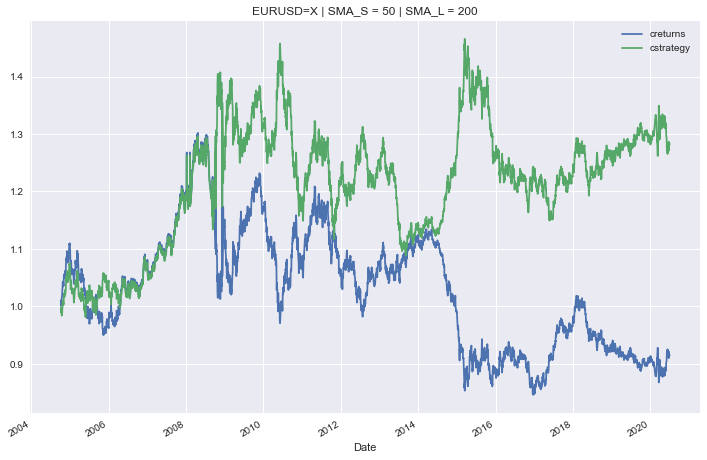

In [24]:
# attempting to plot results again
tester.plot_results()

1. The usefulness of plotting strategy returns is clear from the above plot. 
2. We can see that a major chunk of our strategy's outperformance happened after 2015.
3. Before 2015, our strategy barely beat buy and hold strategy
4. It turns out that 50, 200 SMA crossover was not really consistent in beating buy and hold

# Strategy Optimisation
1. Optimising parameters allows us to find the best performing combination of SMA_S and SMA_L
2. All the combinations in a defined range would be tested for best performing pair

In [25]:
# defining optimize_parameters method to find best performing SMA_S and SMA_L combination

class SMABacktester():
    
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data() 
        
        
    def get_data(self):
        raw = pd.read_csv('forex_pairs.csv', parse_dates = ['Date'], index_col = 'Date')
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start : self.end].copy()
        raw.rename(columns = {self.symbol : 'price'}, inplace = True)
        raw['returns'] = np.log(raw / raw.shift(1))
        raw['SMA_S'] = raw['price'].rolling(self.SMA_S).mean()
        raw['SMA_L'] = raw['price'].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S 
            self.data['SMA_S'] = self.data['price'].rolling(self.SMA_S).mean() 
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data['SMA_L'] = self.data['price'].rolling(self.SMA_L).mean()
            
           
    def test_strategy(self):
        data = self.data.copy().dropna()
        data['position'] = np.where(data['SMA_S'] > data['SMA_L'], 1, -1)
        data['strategy'] = data['position'].shift(1) * data['returns']
        data.dropna(inplace = True)
        data['creturns'] = data['returns'].cumsum().apply(np.exp)
        data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)
        self.results = data
    
        perf = data['cstrategy'].iloc[-1] 
        outperf = perf - data['creturns'].iloc[-1] 
        return round(perf, 6), round(outperf,6)
    
    
    def plot_results(self):
        if self.results is None:
            print('Run test_strategy() first.')
        else:
            title = '{} | SMA_S = {} | SMA_L = {}'.format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[['creturns', 'cstrategy']].plot(title = title, figsize = (12,8))
            
            
    def optimize_parameters(self, SMA_S_range, SMA_L_range):
        # as arguments we need to pass ranges for SMA_S and SMA_L as tuples. Each tuple contains start,end,step 
        combinations = list(product(range(*SMA_S_range), range(*SMA_L_range)))
        # getting all possible combinations with product from itertools. Unpack tuples with * expression and create range
        # objects. Product combines both range objects. A list is then created and saved in a variable combinations
      
        results = []
        for comb in combinations:
            self.set_parameters(comb[0], comb[1])
            # testing all combinations by iterating over combinations. each combination of SMA_S and SMA_L is passed 
            # through set paramters. 
            results.append(self.test_strategy()[0])
            # we are only interested in the performance of the strategy. that's what [0] is for. Each performance is
            # then appended to results list created above
            
        best_perf = np.max(results) 
        # best performance is found using np.max and saved under variable best_perf
        opt = combinations[np.argmax(results)] 
        # optimal parameters are calculated and saved under variable opt
        
        # run/set the optimal strategy
        self.set_parameters(opt[0], opt[1])
        self.test_strategy()
        # this is necessary to plot the optimal strategy with plot_results()
        
        # creating a dataframe with many results
        many_results = pd.DataFrame(data = combinations, columns = ['SMA_S', 'SMA_L'])
        many_results['performance'] = results
        self.results_overview = many_results
        
        return opt, best_perf

In [26]:
# creating an instance of the class to see if optimise_parameters method works
tester = SMABacktester('EURUSD=X', 50, 200, '2004-01-01', '2020-06-30')

In [27]:
# using test_strategy() to get absolute performance

In [28]:
# optimising our strategy and setting ranges as tuples for SMA_S as (10,50) and for SMA_L as (100-252) with step 1
tester.optimize_parameters((10,50,1), (100,252,1))

((46, 137), 2.526694)

In [29]:
# optimize_parameters() returns 46,137 as SMA_S, SMA_L pair with highest absolute performance

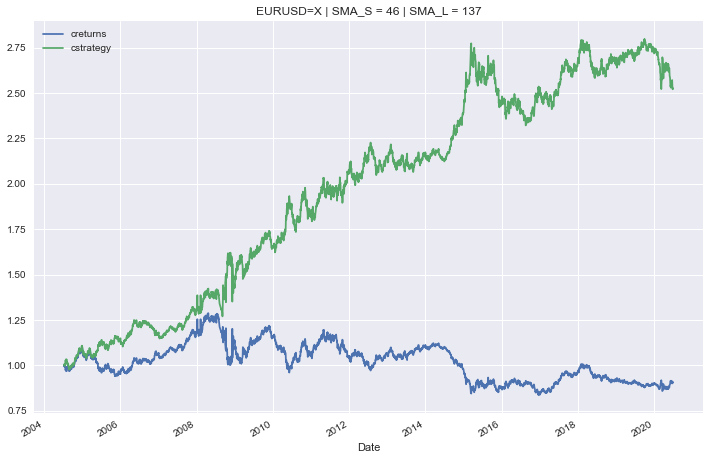

In [30]:
# plotting results for the optimised parameters
tester.plot_results()

In [31]:
# Checking the top 10 best performing SMA_S, SMA_L pairs
tester.results_overview.nlargest(10, 'performance')

,SMA_S,SMA_L,performance
5509,46,137,2.526694
5660,47,136,2.513588
5356,45,136,2.490511
5507,46,135,2.464982
4283,38,127,2.455225
5963,49,135,2.447218
5661,47,137,2.439993
5811,48,135,2.439185
5508,46,136,2.432296
4284,38,128,2.427431


# Splitting get_data() and adding prepare_data()
1. When working with more complex strategies, it makes sense to separate the basic workflows in the get_data() method from the strategy specific workflows.
2. Adding SMA_S and SMA_L are specific for the SMA crossover strategy
3. Basic workflows in get_data() are the same irrespective of the strategy being employed
4. Separating the workflows like this, enhances the readability of our code
5. If we separate workflows, then any strategy changes could be smoothly achieved by modifying prepare_data() method

In [32]:
# defining prepare_data() method and splitting get_data() method

class SMABacktester():
    
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        self.prepare_data() # running prepare_data() in dunder init method to enable its calling at instantiation stage
        
        
    def get_data(self):
        raw = pd.read_csv('forex_pairs.csv', parse_dates = ['Date'], index_col = 'Date')
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start : self.end].copy()
        raw.rename(columns = {self.symbol : 'price'}, inplace = True)
        raw['returns'] = np.log(raw / raw.shift(1))
        self.data = raw
    
    
    def prepare_data(self):
        data = self.data.copy()
        # creating a copy of data to avoid overwriting
        data['SMA_S'] = data['price'].rolling(self.SMA_S).mean()
        data['SMA_L'] = data['price'].rolling(self.SMA_L).mean()
        self.data = data
        # overwriting self.data
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S 
            self.data['SMA_S'] = self.data['price'].rolling(self.SMA_S).mean() 
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data['SMA_L'] = self.data['price'].rolling(self.SMA_L).mean()
            
           
    def test_strategy(self):
        data = self.data.copy().dropna()
        data['position'] = np.where(data['SMA_S'] > data['SMA_L'], 1, -1)
        data['strategy'] = data['position'].shift(1) * data['returns']
        data.dropna(inplace = True)
        data['creturns'] = data['returns'].cumsum().apply(np.exp)
        data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)
        self.results = data
    
        perf = data['cstrategy'].iloc[-1] 
        outperf = perf - data['creturns'].iloc[-1] 
        return round(perf, 6), round(outperf,6)
    
    
    def plot_results(self):
        if self.results is None:
            print('Run test_strategy() first.')
        else:
            title = '{} | SMA_S = {} | SMA_L = {}'.format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[['creturns', 'cstrategy']].plot(title = title, figsize = (12,8))
            
            
    def optimize_parameters(self, SMA_S_range, SMA_L_range):
        combinations = list(product(range(*SMA_S_range), range(*SMA_L_range)))
      
        results = []
        for comb in combinations:
            self.set_parameters(comb[0], comb[1])
            results.append(self.test_strategy()[0])
            
        best_perf = np.max(results) 
        opt = combinations[np.argmax(results)] 
    
        self.set_parameters(opt[0], opt[1])
        self.test_strategy()
      
        many_results = pd.DataFrame(data = combinations, columns = ['SMA_S', 'SMA_L'])
        many_results['performance'] = results
        self.results_overview = many_results
        
        return opt, best_perf

In [33]:
# creating an instance of the class to see if prepare_data() method works
tester = SMABacktester('EURUSD=X', 50, 200, '2004-01-01', '2020-06-30')

In [34]:
# Checking if data retrieval works
tester.data.tail()

,price,returns,SMA_S,SMA_L
Date,,,,
2020-06-24,1.131235,0.002892,1.101794,1.103430
2020-06-25,1.125087,-0.005449,1.102486,1.103540
2020-06-26,1.122208,-0.002562,1.103213,1.103627
2020-06-29,1.122586,0.000337,1.103931,1.103730
2020-06-30,1.124720,0.001899,1.104695,1.103857


In [35]:
# testing strategy
tester.test_strategy()

(1.2835, 0.367674)

In [36]:
# Although the difference is not visible, separating the workflows has enhanced readability of our code

# String Representation and Docstrings
1. These are cosmetic improvements, but they are invaluable for uninformed users of this class.
2. This step must not be skipped.
3. Proper docstrings and meaningful string representation can improve the usability of class.
4. The key words are CONCISE and INTUITIVE.

In [37]:
# Adding docstrings and string representation to our SMABacktester class

class SMABacktester():
    ''' Class for Vectorised backtesting of SMA-based trading strategies.
    '''
    
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        '''
        Parameters
        ----------
        symbol: str
            ticker symbol (instrument) to be backtested
        SMA_S: int
            moving window in bars (e.g. days) for shorter SMA
        SMA_L: int
            moving window in bars (e.g. days) for longer SMA
        start: str
            start date for data import
        end: str
            end date for data import
        '''
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        self.prepare_data()
        
        
    def __repr__(self):
        return "SMABacktester(symbol = {}, SMA_S = {}, SMA_L = {}, start = {}, end = {})".format(self.symbol, 
                                                                self.SMA_S, self.SMA_L, self.start, self.end)
        
        
    def get_data(self):
        ''' Imports the data from forex_pairs.csv (source can be changed).
        '''
        raw = pd.read_csv('forex_pairs.csv', parse_dates = ['Date'], index_col = 'Date')
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start : self.end].copy()
        raw.rename(columns = {self.symbol : 'price'}, inplace = True)
        raw['returns'] = np.log(raw / raw.shift(1))
        self.data = raw
    
    
    def prepare_data(self):
        ''' Prepares the data for strategy backtesting (strategy-specific).
        '''
        data = self.data.copy()
        data['SMA_S'] = data['price'].rolling(self.SMA_S).mean()
        data['SMA_L'] = data['price'].rolling(self.SMA_L).mean()
        self.data = data
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        ''' Updates SMA parameters and the prepared dataset.
        '''
        if SMA_S is not None:
            self.SMA_S = SMA_S 
            self.data['SMA_S'] = self.data['price'].rolling(self.SMA_S).mean() 
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data['SMA_L'] = self.data['price'].rolling(self.SMA_L).mean()
            
           
    def test_strategy(self):
        ''' Backtests the SMA-based trading strategy.
        '''
        data = self.data.copy().dropna()
        data['position'] = np.where(data['SMA_S'] > data['SMA_L'], 1, -1)
        data['strategy'] = data['position'].shift(1) * data['returns']
        data.dropna(inplace = True)
        data['creturns'] = data['returns'].cumsum().apply(np.exp)
        data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)
        self.results = data
    
        perf = data['cstrategy'].iloc[-1] 
        outperf = perf - data['creturns'].iloc[-1] 
        return round(perf, 6), round(outperf,6)
    
    
    def plot_results(self):
        ''' Plots the performance of trading strategy and compares to 'buy and hold'.
        '''
        if self.results is None:
            print('Run test_strategy() first.')
        else:
            title = '{} | SMA_S = {} | SMA_L = {}'.format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[['creturns', 'cstrategy']].plot(title = title, figsize = (12,8))
            
            
    def optimize_parameters(self, SMA_S_range, SMA_L_range):
        ''' Finds the optimal strategy (global maximum) given the SMA parameter ranges.
        
        Parameters
        ----------
        SMA_S_range, SMA_L_range: tuple
            tuples of the form (start, end, step size)
        '''
        combinations = list(product(range(*SMA_S_range), range(*SMA_L_range)))
      
        results = []
        for comb in combinations:
            self.set_parameters(comb[0], comb[1])
            results.append(self.test_strategy()[0])
            
        best_perf = np.max(results) 
        opt = combinations[np.argmax(results)] 
    
        self.set_parameters(opt[0], opt[1])
        self.test_strategy()
      
        many_results = pd.DataFrame(data = combinations, columns = ['SMA_S', 'SMA_L'])
        many_results['performance'] = results
        self.results_overview = many_results
        
        return opt, best_perf

In [38]:
# creating an instance of the class to see if our docstrings have been updated
tester = SMABacktester('EURUSD=X', 50, 200, '2004-01-01', '2020-06-30')

In [39]:
# description of tester
tester

SMABacktester(symbol = EURUSD=X, SMA_S = 50, SMA_L = 200, start = 2004-01-01, end = 2020-06-30)

In [40]:
# checking documentation for optimize_parameter
tester.optimize_parameters()

TypeError: optimize_parameters() missing 2 required positional arguments: 'SMA_S_range' and 'SMA_L_range'